In [4]:
# 3.5.1 获取数据集
%matplotlib inline
import d2lzh as d2l
from mxnet.gluon import data as gdata
import sys
import time

In [9]:
# 通过参数train来指定获取训练数据集或测试数据集
mnist_train = gdata.vision.FashionMNIST(train=True) # 训练集
mnist_test = gdata.vision.FashionMNIST(train=False) # 测试集

In [14]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [17]:
# 通过方括号[]来访问任意⼀个样本
feature,label =mnist_train[0]

In [18]:
# 变量feature对应⾼和宽均为28像素的图像。每个像素的数值为0到255之间8位⽆符号整数（uint8）
# 它使⽤三维的NDArray存储。其中的最后⼀维是通道数。因为数据集中是灰度图像， 所以通道数为1。
feature.shape,feature.dtype

((28, 28, 1), numpy.uint8)

In [22]:
# 图像的标签使⽤NumPy的标量表⽰。它的类型为32位整数（int32）。 
label,type(label),label.dtype

(2, numpy.int32, dtype('int32'))

In [31]:
# 以下函数可以将数值标签转成相应的⽂本标签 
# 本函数已保存在d2lzh包中⽅便以后使⽤ 
def get_fashion_mnist_labels(labels):  # labels为数值标签
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] 
    return [text_labels[int(i)] for i in labels] # 返回⽂本标签的列表

In [96]:
# 下⾯定义⼀个可以在⼀行⾥画出多张图像和对应标签的函数 
# 本函数已保存在d2lzh包中⽅便以后使⽤ 
def show_fashion_mnist(images, labels): 
    d2l.use_svg_display() 
    # 这里的_表⽰我们忽略（不使⽤）的变量
    # 创建1*len(images)个子图即1行len(images)列，每个子图大小为(12, 12)
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12)) 
    for f, img, lbl in zip(figs, images, labels): 
        # reshape设置为(28,28)像素，并显示
        f.imshow(img.reshape((28, 28)).asnumpy()) 
        f.set_title(lbl) # 设置标题为lbl
        # False设置不显示x，y轴
        f.axes.get_xaxis().set_visible(True)
        f.axes.get_yaxis().set_visible(True)

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8, 0])

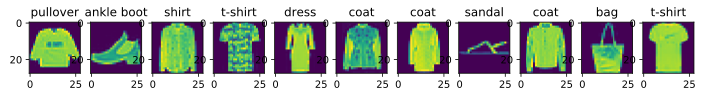

In [161]:
X, y = mnist_train[0:11]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [221]:
# 3.5.2读取小批量
# 我们将获取并读取Fashion-MNIST数据集的逻辑封装在d2lzh. load_data_fashion_mnist函数中供后面章节调用。
# 该函数将返回train_iter和test_iter两个变量。
batch_size =256
# ToTensor实例将图像数据从uint8格式变换成32位浮点数格式，并除以255使得所有像素的数值均在0到1之间。
# ToTensor实例还将图像通道从最后一维移到最前一维来方便之后介绍的卷积神经网络计算。
transformer =gdata.vision.transforms.ToTensor()
# sys.platform获得操作系统的型号，startwith('win')判断字符串是否以win开始
if sys.platform.startswith('win'):
    num_workers =0 # 0表示不用额外的进程来加速读取数据，windows系统不支持使用多进程加速数据读取
else:
    num_workers =4
# DataLoader实例每次读取一个样本数为batch_size的小批量数据。
# DataLoader允许使用多进程来加速数据读取（暂不支持Windows操作系统），我们通过参数num_workers来设置4个进程读取数据。
# 通过数据集的transform_first函数，我们将ToTensor实例的变换应用在每个数据样本（图像和标签）的第一个元素，即图像之上。 
train_iter =gdata.DataLoader(mnist_train.transform_first(transformer),batch_size,shuffle=True,num_workers=num_workers)
test_iter =gdata.DataLoader(mnist_test.transform_first(transformer),batch_size,shuffle=False,num_workers=num_workers)


In [222]:
start =time.time()
for X,y in train_iter:
    continue
'%.2f sec' %(time.time()-start)

'18.43 sec'